In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\91636\OneDrive\Desktop\6th sem\ML\ML lab\datasets\PlayTennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlook_enc'] = le.fit_transform(df['Outlook'])
df['Temp_enc'] = le.fit_transform(df['Temperature'])
df['Hum_enc'] = le.fit_transform(df['Humidity'])
df['wind_enc'] = le.fit_transform(df['Wind'])
le_pt = LabelEncoder()
df['pt_enc'] = le_pt.fit_transform(df['Play Tennis'])
oclass_names = le_pt.classes_

df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis,Outlook_enc,Temp_enc,Hum_enc,wind_enc,pt_enc
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1


In [4]:
df.drop('Outlook',axis=1,inplace=True)
df.drop('Temperature',axis=1,inplace=True)
df.drop('Humidity',axis=1,inplace=True)
df.drop('Wind',axis=1,inplace=True)
df.drop('Play Tennis',axis=1,inplace=True)
df.head()

,Outlook_enc,Temp_enc,Hum_enc,wind_enc,pt_enc
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [5]:
x = df.drop('pt_enc',axis=1)
y = df['pt_enc']

In [6]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [7]:
new_sample = [[2,1,0,1]]
ypred = dtree.predict(new_sample)
print(ypred)

[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


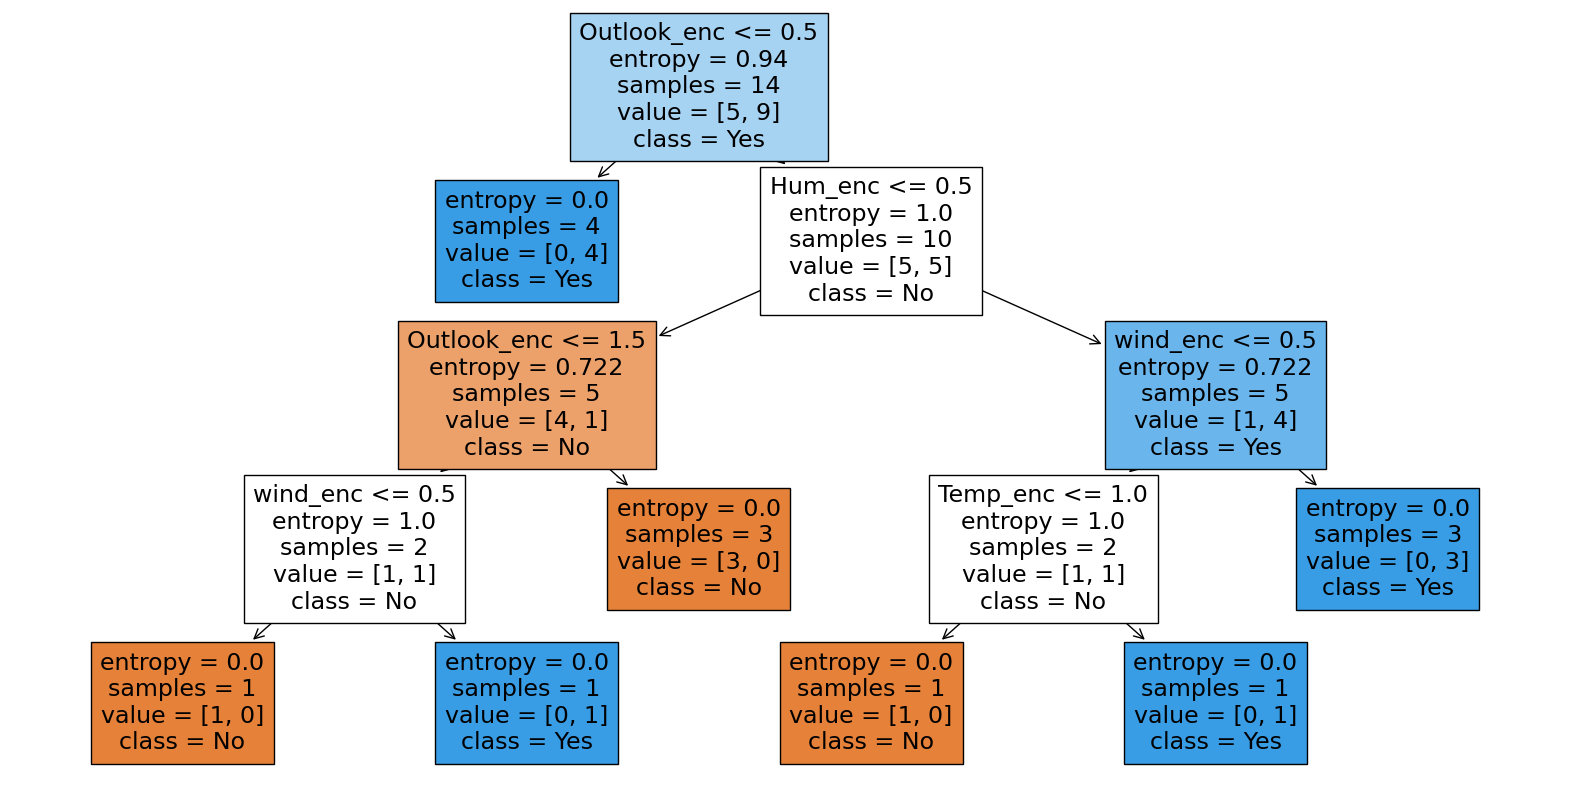

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dtree,filled=True,feature_names=x.columns,class_names=oclass_names)
plt.show()